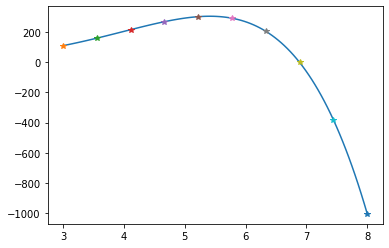

In [8]:
## -- the file presents a simple example of a interpolating procedure using Newton method

import numpy as np
from matplotlib import pyplot as plt


def eval_poly(x, n, xxi, coefs):
    # -- the function evaluet a value of Newton's polynomial using an afficient approach
    p = coefs[0, max(coefs.shape) - 1]
    for k in range(n - 1, 0, -1):
        # print(k)
        p = p * (x - xxi[0, k - 1]) + coefs[0, k - 1]
    px = p
    return px

#-- define sample imput data (cocrdinates of points to interpolate)
xi = np.linspace(3, 8, 10)
xi = np.asanyarray(xi)
xi = np.array(xi)[np.newaxis]
yi = -0.2 * xi ** 5 + 1.3 * xi ** 4 + 2.7 * xi ** 2 + 4.3 * xi + 16

nPoints = np.max(xi.shape)

#-- define a domain to create a plot after interpolation
xx = np.linspace(np.min(xi), np.max(xi), nPoints * 10)
xx = np.asanyarray(xx)
xx = np.array(xx)[np.newaxis]  # -- zeby postrzegal to jako konstrukcje 1xn (tablice)

#-- starting interpolation procedure
mat = np.zeros((nPoints, nPoints + 1))

##--looping thru columns
for i in range(0, max(mat.shape) - 1):
    mat[i, 0] = xi[0, i]
    mat[i, 1] = yi[0, i]
ax = 1

## creating of triangular structure of a matrix
for k in range(1, nPoints - 1):
    # print(k)
    for r in range(k, nPoints):
        # print(r)
        mat[r, k + 1] = ((mat[r, k] - mat[r - 1, k]) / (mat[r, 0] - mat[r - ax, 0]))
    ax += 1
    
#-- picking up the polynomial coefficients
coefs = np.diag(mat[:, 1::])
coefs = np.array(coefs)[np.newaxis]

# --converting them to a handy matric format
coefs = np.asanyarray(coefs)

#-- alocation of memory for a results of polynomoial evaluation
yy = np.zeros((1, max(xx.shape)))

# --call a function to compute the coefficients of Newton Polynomial
for i in range(0, max(xx.shape)):
    yy[0, i] = eval_poly(xx[0, i], nPoints, xi, coefs)

#-- making a plot
plt.plot(xx[0, :], yy[0, :], xi, yi, '*')
plt.show()
